# Comparison between KMeans and SNMF Clustering with Linear-Kernel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel

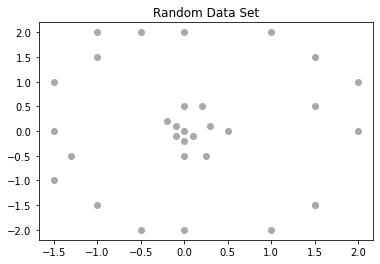

In [2]:
# Data Set
X = [[0,0],[0.3,0.1],[0.1,-0.1],[-0.1,0.1],[-0.1,-0.1], [-0.2,0.2], [0.2,0.5], 
     [0.5,0], [0,-0.5], [0.25,-0.5], [1.5,-1.5],[1.5,-1.5],[-1.5,1],[-1.5,-1], 
     [0,-2], [0,2], [1,2], [2,1], [-1.5,0], [2,0], [0,0.5], [0,-0.2], [1.5,1.5],
     [-1,-1.5], [-1,1.5], [1,-2],[-1.3,-0.5], [-0.5,2], [-1,2], [1.5,0.5], [-0.5,-2]
    ]

# Plotting
x = [x[0] for x in X]
y = [y[1] for y in X]
plt.scatter(x,y, color = "darkgrey")
plt.title("Random Data Set")
plt.show()
#print("Data Set: " + str(X))

In [3]:
def update(W,r):
    rep = 0
    max_rep = 25
    H = np.random.rand(len(W),r)
    while rep < max_rep:
        rep = rep + 1
        B = 0.5
        WH = np.matmul(W,H)
        HHTH = np.matmul(np.matmul(H,H.T),H)
        for i in range(len(W)):
            for k in range(r):
                H[i,k] = H[i,k] * (1- B + B * WH[i,k] / HHTH[i,k])
    return H

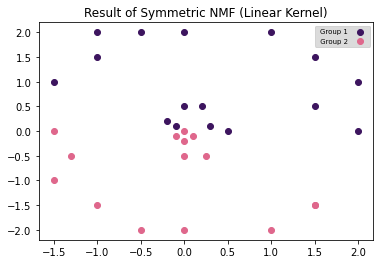

In [4]:
K = np.matmul(X,np.transpose(X))
H = update(K,2)
group0 = []
group1 = []
for i in range(np.shape(X)[0]):
    if H[i][0] > H[i][1]:
        group0.append(X[i])
    else:
        group1.append(X[i])
        
x0 = [x[0] for x in group0]
y0 = [y[1] for y in group0]

x1 = [x[0] for x in group1]
y1 = [y[1] for y in group1]
plt.scatter(x0, y0, color = "#3D155F")
plt.scatter(x1, y1, color = "#DF678C")
plt.title("Result of Symmetric NMF (Linear Kernel)")
plt.legend(["Group 1"," Group 2"], loc = "upper right", fontsize = "x-small", facecolor = "lightgrey", markerfirst = False)
plt.show()

In [5]:
from sklearn.cluster import KMeans

C:\Users\Kevin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


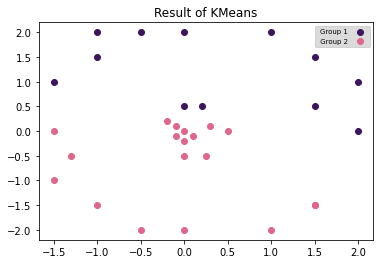

In [6]:
model = KMeans(n_clusters=2).fit(X)
group0 = []
group1 = []
for i in range(len(model.labels_)):
    if model.labels_[i] == 0:
        group0.append(X[i])
    else:
        group1.append(X[i])
x0 = [x[0] for x in group0]
y0 = [y[1] for y in group0]

x1 = [x[0] for x in group1]
y1 = [y[1] for y in group1]
plt.scatter(x0, y0, color = "#3D155F")
plt.scatter(x1, y1, color = "#DF678C")
plt.title("Result of KMeans")
plt.legend(["Group 1"," Group 2"], loc = "upper right", fontsize = "x-small", facecolor = "lightgrey", markerfirst = False)
plt.show()